In [12]:
#created and edited by Samuel Phillips

#imports for data, classes and more
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

Interesting facts/ takeaways:
 - There is a strong positive correlation between calories burned in a day and steps taken in a day
 - Correct Predictions: 55
 - Incorrect Predictions: 133
 - Error Rate Percentage in the test sample: 70.74468085106383%
 - Major Takeaway from this Assignment: K nearest neighbor has a high error rate with high population counts
 - Maybe this could be a good example of why k nearest neighbor classifier works best with smaller population sizes


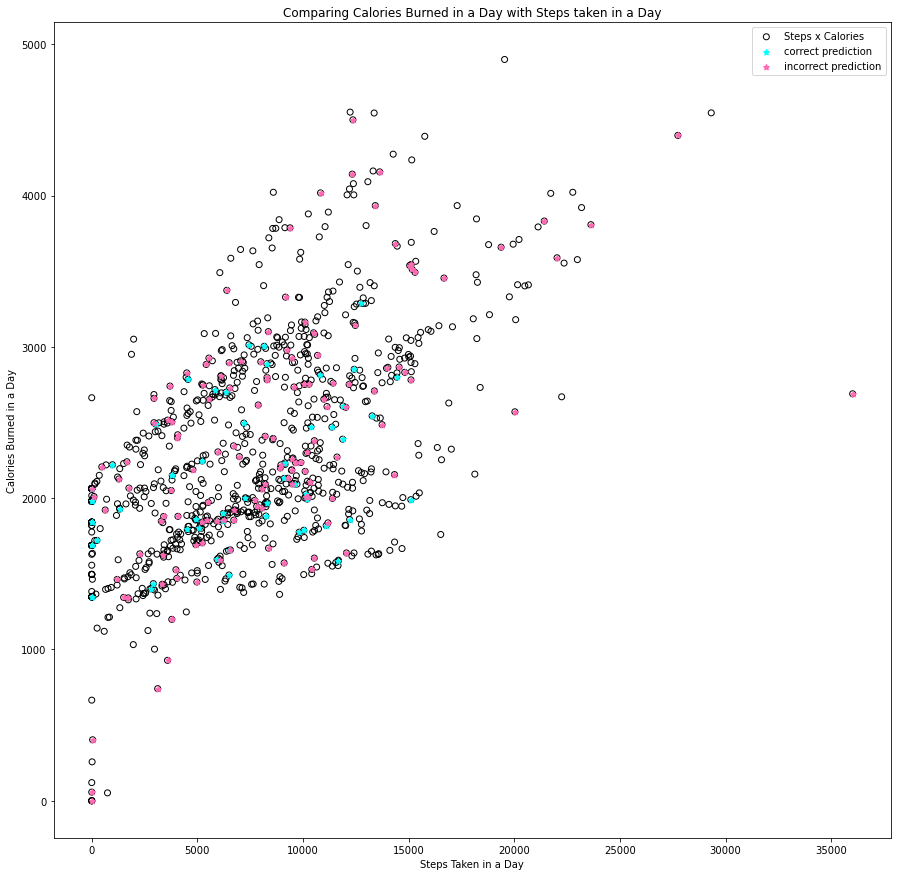

In [130]:
#decided to use classifiers on the fitbit data with topics from assignment 2
#as I think comparing two topics and then using the k nearest neighbor classifier
#is a good way to compare two similar topics
#also wanted to do a scatterplot to show attributes of the fitbit data

#fitbit data is loaded
#used daily steps taken and daily calories burned from the series
#of different fitbit csv files
data = pd.read_csv('Fitabase_Data/dailySteps_merged.csv')
d1 = data.loc[:,'StepTotal']
d1 = d1.values
data = pd.read_csv('Fitabase_Data/dailyCalories_merged.csv')
d2 = data.loc[:,'Calories']
d2 = d2.values

#X value for train test split is found
X = []
for i in range(0, len(d1)):
    X.append([d1[i], d2[i]])

#y value for the train test split is found
ids = data.loc[:, 'Id']
y = ids.values

#train test split with k nearest neighbors is used in this example
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
n = KNeighborsClassifier()
n.fit(X_train, y_train)
p1 = n.predict(X_test)
X_test = np.array(X_test)

#figure is created and first point is 
plt.figure(figsize=(15,15))

#plot is supplied with all the correlated points between calories and steps in a day
plt.scatter(X[0][0], X[0][1], facecolors='none', edgecolors='black', label='Steps x Calories')
for i in range(1, len(y)):
    plt.scatter(X[i][0], X[i][1], facecolors='none', edgecolors='black')

#incorrect and correct lists are stated
corrX, corrY = [], []
incorX, incorY = [], []

#for loop that finds all the incorrect and correct points from
#the k nearest neighbor train test split
for i in range(0, len(p1)):
    if p1[i] == y_test[i]:
        corrX.append(X_test[:, :1][i])
        corrY.append(X_test[:, 1:][i])

    elif p1[i] != y_test[i]:
        incorX.append(X_test[:, :1][i])
        incorY.append(X_test[:, 1:][i])    
        
#first points of the correct and incorrect predictions are plotted
plt.scatter(corrX[0], corrY[0], color='cyan', marker=(5, 1), label='correct prediction')
plt.scatter(incorX[0], incorY[0], color='hotpink', marker=(5, 1), label='incorrect prediction')

#two for loops that plot the incorrect and correct prediction points
for i in range(0, len(corrX)):
    plt.scatter(corrX[i], corrY[i], color='cyan', marker=(5, 1)) 
for i in range(0, len(incorX)):
    plt.scatter(incorX[i], incorY[i], color='hotpink', marker=(5, 1))

#plot is given attributes to help with analysis
plt.legend()
plt.xlabel('Steps Taken in a Day')
plt.ylabel('Calories Burned in a Day') 
plt.title('Comparing Calories Burned in a Day with Steps taken in a Day')

#error rate is found and set
err = (len(incorX))/(len(incorX)+len(corrX))
err = err*100

#interesting takeaways from this assignment printed out
print('Interesting facts/ takeaways:')
print(' - There is a strong positive correlation between calories burned in a day and steps taken in a day')
print(' - Correct Predictions: ' + str(len(corrX)))
print(' - Incorrect Predictions: ' + str(len(incorX)))
print(' - Error Rate Percentage in the test sample: ' + str(err) + '%')
print(' - Major Takeaway from this Assignment: K nearest neighbor has a high error rate with high population counts')
print(' - Maybe this could be a good example of why k nearest neighbor classifier works best with smaller population sizes')

#finally the scatter plot is saved as a pdf file
plt.savefig('a6_scatter.pdf')